In [11]:
# Matplotlib - 2D plotting library
from matplotlib import pyplot as plt
from matplotlib import rcParams

# Show matplotlib figures inline the notebook
%matplotlib inline

# Pandas - High-performance data analysis
import pandas

# Glob - Unix style pathname pattern expansion
# Used to aggregate folders and files into a single list so they can be iterated over
import glob

# Numpy - For handling of large, multi-dimensional arrays and matrices
import numpy as np

# Scipy - For accurate integration
from scipy.integrate import simps
from scipy.integrate import trapz

##########################################################################################
# Setting rcParams for publication quality graphs
fig_width_pt = 246.0                    # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # Width in inches
fig_height = fig_width*golden_mean      # Height in inches
fig_size =  [fig_width, fig_height]
fig_size =  [7.3,4.2]
# fig_size =  [7.3*1.5,4.2*1.5]
# fig_size =  [7.3*2,4.2*2]
params = {'backend': 'pdf',
        'axes.labelsize': 10,
        'legend.fontsize': 9,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'xtick.major.size': 6,
        'xtick.major.width': 1,
        'xtick.minor.size': 2.5,
        'xtick.minor.width': 1,
        'ytick.major.size': 6,
        'ytick.major.width': 1,
        'ytick.minor.size': 2.5,
        'ytick.minor.width': 1,
        'font.family': 'times-new-roman',
        'font.sans-serif': 'Times New Roman',
        'font.size': 10,
        'text.usetex': True,
        'figure.figsize': fig_size}

# Update rcParams
rcParams.update(params)

In [12]:
##########################################################################################
# Energy of incident (input) particles
InputEnergies = np.array([np.linspace(100,900, num=9, endpoint=True, dtype = int),
                          np.linspace(1000,9000, num=9, endpoint=True, dtype = int),
                          np.linspace(10000,90000, num=9, endpoint=True, dtype = int),
                          np.linspace(100000,900000, num=9, endpoint=True, dtype = int),
                               ]).flatten()
InputEnergies = np.insert(InputEnergies, [len(InputEnergies+1)], [1000000])
DataFolder = '../G4AdEPTCubeSat_Results/Neutrons/'

##########################################################################################
# Energy thresholds (in eV) for events that will be included in the analysis
Thr_Gas = 100.
print InputEnergies

[    100     200     300     400     500     600     700     800     900
    1000    2000    3000    4000    5000    6000    7000    8000    9000
   10000   20000   30000   40000   50000   60000   70000   80000   90000
  100000  200000  300000  400000  500000  600000  700000  800000  900000
 1000000]


In [19]:
##########################################################################################
# Load the simulation data for each input energy
Data = []

for InputEnergy in InputEnergies:
    # Create data file template from current energy
    if InputEnergy <= 9000:
        DataFilename = 'neutron_' + str(InputEnergy) + 'keV_Nr_10000000_ISO_nt_G4AdEPTCubeSat_t[0-7].csv'
    else:
        DataFilename = 'neutron_' + str(InputEnergy) + 'keV_Nr_1000000_ISO_nt_G4AdEPTCubeSat_t[0-7].csv'
    # Statistics variables for each input energy data
    nPos = 0
    nElec = 0
    nSubPos = 0
    nSubElec = 0
    nTotal = 0
    nSubThr = 0
    nCompton = 0
    nPair = 0
    nPhoto = 0
    nTriton = 0
    
    # Print energy 
    print '\n------------------------------------------------------------'
    print 'Energy: \t\t', str(InputEnergy), 'keV'

    ##########################################################################################
    # Process the simulation data files
    # Column 0 - Total energy deposited in the sensitive gas volume [eV]
    # Column 1 - Energy deposited by positrons in the sensitive gas volume [eV]
    # Column 2 - Energy deposited by positrons in the sensitive gas volume [eV]
    # Column 3 - Energy deposited by tritons in the sensitive gas volume [eV]
    # Column 4 - Track length of particles in the sensitive gas volume [mm]
    # Column 5 - Number of secondary electrons generated in the sensitive gas volume
    # Column 6 - Number of secondary photons generated in the sensitive gas volume
    # Column 7 - Number of secondary positrons generated in the sensitive gas volume
    # Column 8 - Number of secondary tritons generated in the sensitive gas volume
    for dataFile in glob.glob(DataFolder + DataFilename):
        # Readout CSV files
        try:
            dataFrame = pandas.read_csv(dataFile, usecols=[0,1,2,3,4,5,6,7,8], comment="#", error_bad_lines=False, skip_blank_lines=True).values

            # Determine the interaction type
            for i in range(1,len(dataFrame)):
                if dataFrame[i,0] > Thr_Gas:
    #                 if dataFrame[i,8] > 0:
    #                     nTriton += 1
                    if dataFrame[i,7] > 0 and dataFrame[i,5] > 0:
                        nPair += 1
                    else:
                        if dataFrame[i,6] > 0. and dataFrame[i,5] > 0.:
                            nCompton += 1
                        else:
                            nPhoto += 1

            # Increment statistics
            nPos += dataFrame[(dataFrame[:,1] > Thr_Gas),0].size
            nElec += dataFrame[(dataFrame[:,2] > Thr_Gas),0].size
            nSubPos += dataFrame[(dataFrame[:,1] <= Thr_Gas),0].size
            nSubElec += dataFrame[(dataFrame[:,2] <= Thr_Gas),0].size
            nTotal += dataFrame[(dataFrame[:,0] > Thr_Gas),0].size
            nSubThr += dataFrame[(dataFrame[:,0] <= Thr_Gas),0].size
        except:
            pass
        
    # Add statistics to data list (Convert to numpy array later)
    Data.append([InputEnergy,nPos,nElec,nSubPos,nSubElec,nTotal,nSubThr,nCompton,nPair,nPhoto,nTriton])
        
    # Print statistics
    print '------------------------------------------------------------'
    print 'Number of events above threshold: \t', nTotal
    print 'Number of events below threshold: \t', nSubThr
    print 'Number of Pair Production events: \t', nPair
    print 'Number of Triton creations: \t', nTriton
    print '------------------------------------------------------------'
    
# Convert statistics list to Numpy array
Data = np.asarray(Data)


------------------------------------------------------------
Energy: 		100 keV
------------------------------------------------------------
Number of events above threshold: 	0
Number of events below threshold: 	0
Number of Pair Production events: 	0
Number of Triton creations: 	0
------------------------------------------------------------

------------------------------------------------------------
Energy: 		200 keV
------------------------------------------------------------
Number of events above threshold: 	0
Number of events below threshold: 	0
Number of Pair Production events: 	0
Number of Triton creations: 	0
------------------------------------------------------------

------------------------------------------------------------
Energy: 		300 keV
------------------------------------------------------------
Number of events above threshold: 	0
Number of events below threshold: 	0
Number of Pair Production events: 	0
Number of Triton creations: 	0
-----------------------------

In [23]:
##########################################################################################
# Calculate the geometry factor (G) assuming an isotropic radiation environment.
# The detector is centered on, and encircled by, a spherical source of radius (R) and
# with N_R simulated particles distributed uniformly along the inner surface.

# Source information (Get this from the Geant4 simulation!!)
N_R = 10000000.#100000000.
N_R_2 = 1000000.
R = 10.

# Calculate the geometry factors
G_Pair_1 = Data[:18,8]/N_R*4*(np.pi**2)*(R**2)
G_Pair_2 = Data[18:,8]/N_R*4*(np.pi**2)*(R**2)
G_Pair = np.array([])
G_Pair = np.append(G_Pair_1,G_Pair_2)

G_Total_1 = Data[:18,5]/N_R*4*(np.pi**2)*(R**2)
G_Total_2 = Data[18:,5]/N_R_2*4*(np.pi**2)*(R**2)
G_Total = np.array([])
G_Total = np.append(G_Total_1,G_Total_2)

G_Neu = Data[:,9]/N_R*4*(np.pi**2)*(R**2)

# Calculate the errors for geometry factors 
err_G_Total_1 = 4*(np.pi**2)*(R**2)*np.sqrt((1-Data[:18,5]/N_R)*Data[:18,5]/N_R**2)
err_G_Total_2 = 4*(np.pi**2)*(R**2)*np.sqrt((1-Data[18:,5]/N_R)*Data[18:,5]/N_R**2)
err_G_Total = np.array([])
err_G_Total = np.append(err_G_Total_1,err_G_Total_2)

err_G_Pair = 4*(np.pi**2)*(R**2)*np.sqrt((1-Data[:,8]/N_R)*Data[:,8]/N_R**2)
err_G_Neu = 4*(np.pi**2)*(R**2)*np.sqrt((1-Data[:,9]/N_R)*Data[:,9]/N_R**2)

# Calculate relative errors for the geometry factors
relErr_G_Total = err_G_Total/G_Total
relErr_G_Pair = err_G_Pair/G_Pair
relErr_G_Neu = err_G_Neu/G_Neu

Plot saved to: ../G4AdEPTCubeSat_Results/Neutrons/Geometric_Factor_Neutron.pdf


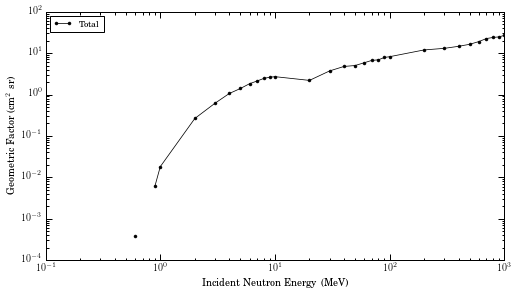

In [24]:
##########################################################################################
# Plot the Geometry Factor over a range of particle energies
figG, axG = plt.subplots(1,1)

# plt.loglog(Data[:,0]/1000., G_Neu, 'r.-', linewidth=0.75, label="Neutron")
plt.loglog(Data[:,0]/1000., G_Total, 'k.-', linewidth=0.75, label="Total")
# plt.loglog(Data[:,0]/1000., G_Pair, 'b.-', linewidth=0.75, label="Pair Production")
# plt.errorbar(Data[:,0]/1000., G_Pair, xerr=0, yerr=err_G_Pair, fmt='.')

# Figure Properties
axG.set_ylabel(r'Geometric Factor (cm$^2$ sr)')  
axG.set_xlabel('Incident Neutron Energy (MeV)') 
# axG.set_ylim(0.01, 2000.)
# axG.set_xlim(0.09, 8)

axG.legend(loc='upper left')

# Tight Layout
plt.tight_layout()

# Save the figure 
file_figG = 'Geometric_Factor_Neutron.pdf'
plt.savefig(DataFolder + file_figG, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_figG)

# Show the figure
plt.show(figG)

Plot saved to: ../G4AdEPTCubeSat_Results/Neutrons/Geometric_Factor_Error_Neutron.pdf


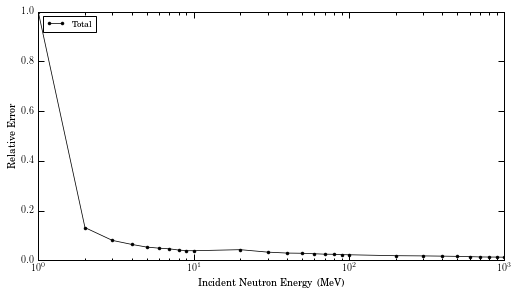

[         nan          nan          nan          nan          nan
          nan          nan          nan          nan  99.9999995
  13.13063948   7.98086258   6.36283977   5.28515477   4.85641902
   4.58348158   4.10996252   3.8432992    3.82638059   4.24475182
   3.26162504   2.88193474   2.80826198   2.60111512   2.43610716
   2.39385861   2.245044     2.19738145   1.82086514   1.74259709
   1.64618562   1.55658845   1.44349141   1.32647427   1.2872066
   1.26669701   1.21712016]
[         nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan  70.71067741  70.71067741  70.71067741          nan
  99.9999995           nan  99.9999995           nan          nan
          nan  99.9999995           nan  99.9999995           nan
          nan          nan          nan  99.9999995   99.9999995
  99.9999995   99.9999995 ]


In [18]:
##########################################################################################
# Plot the error in the Geometry Factor over a range of particle energies
figE, axE = plt.subplots(1,1)

# plt.plot(Data[:,0]/1000., relErr_G_Pair, 'b.:', linewidth=0.75, label="Pair Production")
plt.semilogx(Data[:,0]/1000., relErr_G_Total, 'k.-', linewidth=0.75, label="Total")

# Figure Properties
axE.set_ylabel(r'Relative Error')  
axE.set_xlabel('Incident Neutron Energy (MeV)') 
# axE.set_ylim(0., 0.05)
# axE.set_xlim(0.1, 1001)

axE.legend(loc='upper left')

# Tight Layout
plt.tight_layout()

# Save the figure 
file_figE = 'Geometric_Factor_Error_Neutron.pdf'
plt.savefig(DataFolder + file_figE, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_figE)

# Show the figure
plt.show(figE)
print relErr_G_Total*100.
print relErr_G_Pair*100.